In [1]:
from encodings.iso8859_4 import decoding_table

import pandas as pd
import os

In [32]:
Root_dir=r"C:\Users\User\Downloads\60 days of python\day-30"
data_dir=os.path.join(Root_dir,'DATA')
dataset_path=os.path.join(data_dir,'air_quality_data.csv')
saved_model_dir=os.path.join(Root_dir,'saved_model')

In [9]:
dataset=pd.read_csv(dataset_path)
dataset.head()

,PM2.5,PM10,NO2,CO,Temperature,Humidity,AQI,Safe
0,74.908024,55.539879,26.170568,6.727030,18.599794,39.363552,194.477086,0
1,190.142861,162.570284,24.697880,7.966814,30.271616,47.343566,51.715909,1
2,146.398788,261.883751,90.625458,2.504679,28.008046,85.454739,261.718369,0
3,119.731697,219.667466,24.954620,6.248741,-2.305005,34.000439,183.934872,0
4,31.203728,241.968344,27.194973,5.717460,-2.537527,86.964968,47.161165,1


In [130]:
dataset['Safe'].value_counts()

Safe
0    658
1    342
Name: count, dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        1000 non-null   float64
 1   PM10         1000 non-null   float64
 2   NO2          1000 non-null   float64
 3   CO           1000 non-null   float64
 4   Temperature  1000 non-null   float64
 5   Humidity     1000 non-null   float64
 6   AQI          1000 non-null   float64
 7   Safe         1000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [13]:
dataset.describe()

,PM2.5,PM10,NO2,CO,Temperature,Humidity,AQI,Safe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,98.051311,152.105192,50.240573,4.903750,14.705266,49.846449,147.992652,0.342000
std,58.427472,87.656968,29.067420,2.864893,14.340497,28.919481,86.920092,0.474617
min,0.926405,0.965479,0.001163,0.006534,-9.998464,0.618382,0.428503,0.000000
25%,47.194654,72.322281,26.135098,2.419008,2.248700,24.938000,72.066499,0.000000
50%,99.361475,155.620172,50.061392,4.842793,14.729905,49.040282,145.392907,0.000000
75%,148.863918,228.139517,75.910353,7.375408,26.999673,73.985178,226.939304,1.000000
max,199.943535,299.824118,99.782086,9.995577,39.887469,99.935030,299.838204,1.000000


In [22]:
dataset.columns

Index(['PM2.5', 'PM10', 'NO2', 'CO', 'Temperature', 'Humidity', 'AQI', 'Safe'], dtype='object')

In [24]:
x=dataset[['PM2.5', 'PM10', 'NO2', 'CO', 'Temperature', 'Humidity']]
y_reg=dataset['AQI']
y_clf=dataset['Safe']


# **Standardization**

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_scaled[:5]

,PM2.5,PM10,NO2,CO,Temperature,Humidity
0,-0.396301,-1.102179,-0.828489,0.636740,0.271711,-0.362667
1,1.576957,0.119447,-0.879179,1.069707,1.086025,-0.086590
2,0.827893,1.252992,1.390047,-0.837822,0.928101,1.231907
3,0.371251,0.771143,-0.870342,0.469708,-1.186764,-0.548210
4,-1.144685,1.025681,-0.793229,0.284170,-1.202986,1.284155


# **Save the Scaler Transformed Model**

In [36]:
import joblib
joblib.dump(sc,os.path.join(saved_model_dir,"scaler.pkl"))

['C:\\Users\\User\\Downloads\\60 days of python\\day-30\\saved_model\\scaler.pkl']

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_reg,test_size=0.2,random_state=42)
x_train.shape

(800, 6)

In [129]:
from sklearn.linear_model import LinearRegression
Linear_model=LinearRegression()
Linear_model.fit(x_train,y_train)
joblib.dump(Linear_model,os.path.join(saved_model_dir,"linear_model.pkl"))
y_pred=Linear_model.predict(x_test)

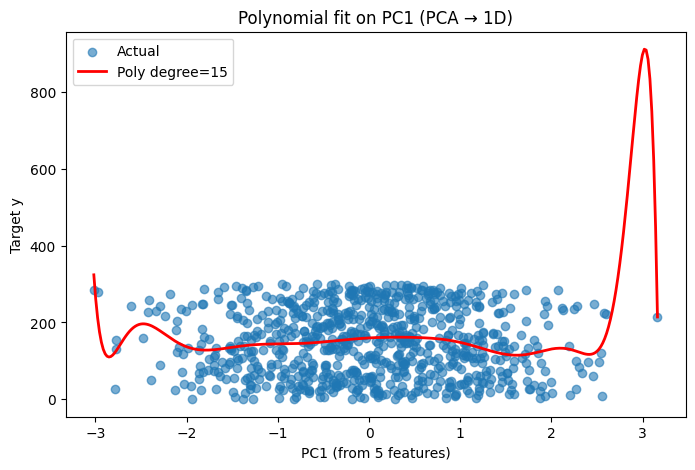

In [96]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
#
# # X: shape (n_samples, 5), y: shape (n_samples,)
# # Standardize then PCA to 1D
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(x_train)
#
# pca = PCA(n_components=1)
# X_pc1 = pca.fit_transform(X_scaled).ravel()  # shape (n_samples,)
#
# # Fit polynomial on PC1
# degree = 15
# poly_pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
#                           StandardScaler(),
#                           LinearRegression())
# X_pc1_reshaped = X_pc1.reshape(-1,1)
# poly_pipe.fit(X_pc1_reshaped, y_train)
# y_pred = poly_pipe.predict(X_pc1_reshaped)
#
# # Smooth curve for plotting
# x_line = np.linspace(X_pc1.min(), X_pc1.max(), 300).reshape(-1,1)
# y_line = poly_pipe.predict(x_line)
#
# # Plot
# plt.figure(figsize=(8,5))
# plt.scatter(X_pc1, y_train, c='C0', alpha=0.6, label='Actual')
# plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Poly degree={degree}')
# plt.xlabel('PC1 (from 5 features)')
# plt.ylabel('Target y')
# plt.title('Polynomial fit on PC1 (PCA → 1D)')
# plt.legend()
# plt.show()


In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly=PolynomialFeatures(degree=2)
poly_reg_model=make_pipeline(poly,LinearRegression())
poly_reg_model.fit(x_train,y_train)
joblib.dump(poly_reg_model,os.path.join(saved_model_dir,"polynomial_reg_model.pkl"))

['C:\\Users\\User\\Downloads\\60 days of python\\day-30\\saved_model\\polynomial_reg_model.pkl']

In [102]:
from sklearn.model_selection import train_test_split
x_train_clf,x_test_clf,y_train_clf,y_test_clf=train_test_split(x_scaled,y_clf,test_size=0.2,random_state=42,stratify=y_clf)
from sklearn.preprocessing import PolynomialFeatures
x_train_clf.shape

(800, 6)

In [104]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train_clf,y_train_clf)
joblib.dump(logistic_model,os.path.join(saved_model_dir,"logistic_model.pkl"))


['C:\\Users\\User\\Downloads\\60 days of python\\day-30\\saved_model\\logistic_model.pkl']

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_clf, y_train_clf)
joblib.dump(logistic_model, os.path.join(saved_model_dir, 'rf_classifier.pkl'))

['C:\\Users\\User\\Downloads\\60 days of python\\day-30\\saved_model\\rf_classifier.pkl']

In [115]:
reg_models={
    'linear_regression':Linear_model,
    'Polynomial_regression':poly_reg_model,
}
classification_models={
    "Logistic_Regression":logistic_model,
    "Random_Forest_Classifier":rf_classifier,

}

In [121]:
from sklearn.metrics import mean_squared_error
for name,model in reg_models.items():
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    print(f"Model={name} mse={mse:0.2f}")


Model=linear_regression mse=7329.39
Model=Polynomial_regression mse=7573.59


In [120]:
from sklearn.metrics import accuracy_score

for name, model in classification_models.items():
    y_pred_clf = model.predict(x_test_clf)
    acc = accuracy_score(y_test_clf, y_pred_clf)
    print(f"{name} - Accuracy: {acc:.2f}")

Logistic_Regression - Accuracy: 0.66
Random_Forest_Classifier - Accuracy: 0.67


<Axes: >

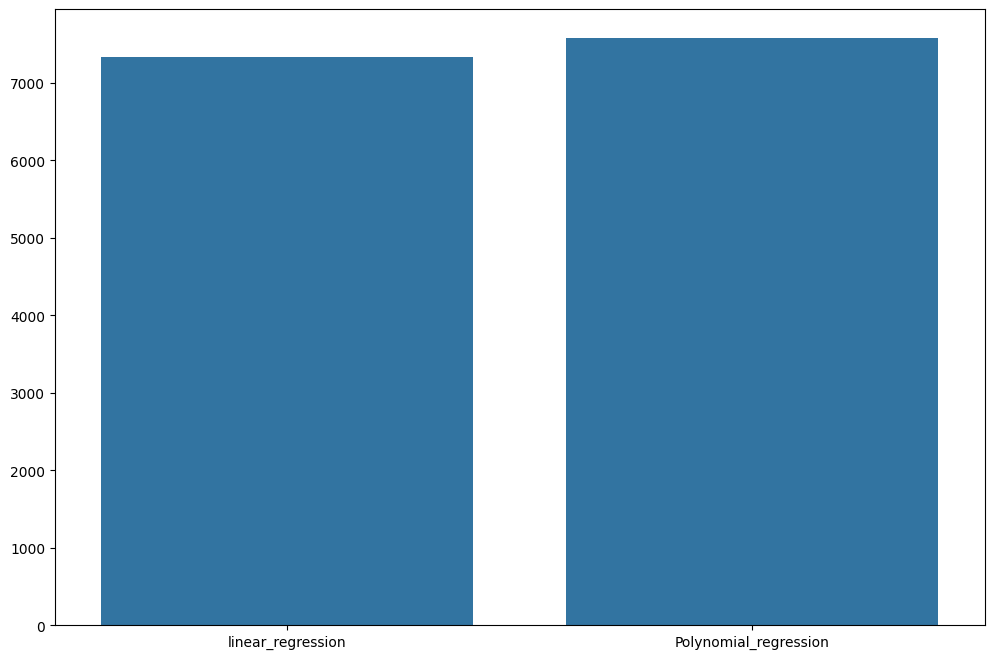

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
mse=[7329.39,7573.59]
sns.barplot(x=list(reg_models.keys()),y=mse)
